In [ ]:
from bmtk.builder import NetworkBuilder
from bmtk.utils.sim_setup import build_env_bionet
from bmtk.builder.auxi.node_params import positions_cuboid,positions_list
import numpy as np


x = np.array([0,0])
y = np.array([0,0])
z = np.array([0,200])
positions = np.vstack([x, y, z]).T

net = NetworkBuilder('bio_net')
net.add_nodes(N=2, 
              pop_name='FSI',
              positions=positions_list(positions),
              model_type='biophysical',
              model_template='hoc:FSI_Cell',
              morphology='blank.swc')

net.save('network/')

if False:
    build_env_bionet(base_dir='./',      
                    network_dir='network/',
                    tstop=300.0, dt=0.05,
                    include_examples=False,    
                    compile_mechanisms=False,   
                    config_file='config.json',
                    overwrite_config=True
                    )

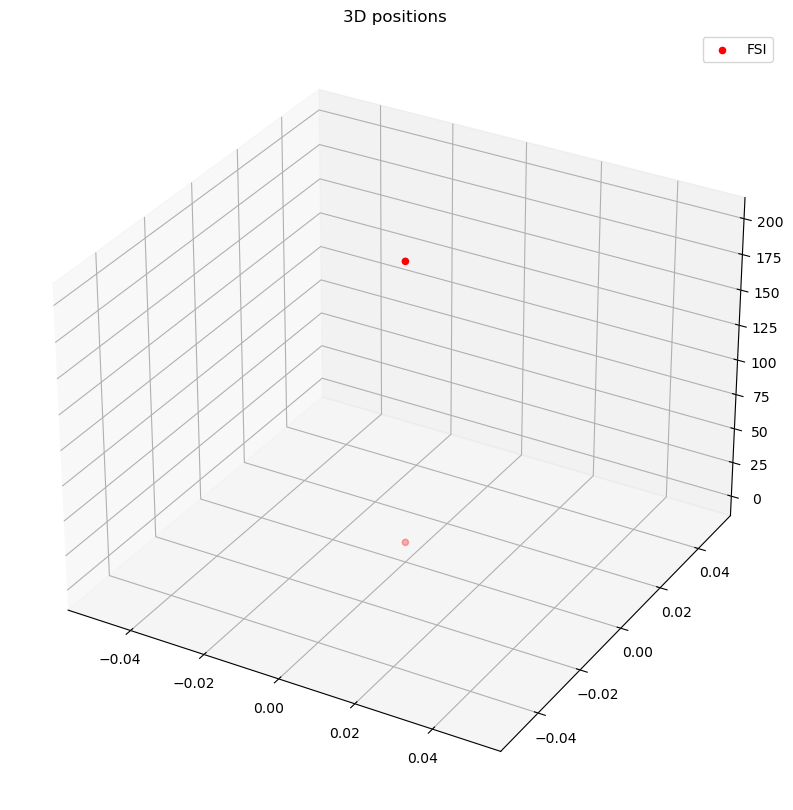

In [2]:
from bmtool import bmplot as bp
import matplotlib.pyplot as plt

bp.plot_3d_positions(config='config.json', # A BMTK config
                     populations_list='bio_net', # Network you want to plot same as sources or targets from above
                     group_by='pop_name', # node attribute same thing as sid or tid above
                     )
plt.show()

In [ ]:
import os

os.system("python test_opto_run.py")
# for multiple threads mpiexec -n 2 nrniv -mpi -python test_opto_run.py but needs to be on CLI

--No graphics will be displayed.


2024-11-26 10:34:31,898 [INFO] Created log file
2024-11-26 10:34:31,944 [INFO] Building cells.
2024-11-26 10:34:31,953 [INFO] Building recurrent connections
2024-11-26 10:34:31,961 [INFO] Running simulation for 3000.000 ms with the time step 0.050 ms
2024-11-26 10:34:31,962 [INFO] Starting timestep: 0 at t_sim: 0.000 ms
2024-11-26 10:34:31,962 [INFO] Block save every 5000 steps
2024-11-26 10:34:33,128 [INFO]     step:5000 t_sim:250.00 ms
2024-11-26 10:34:34,335 [INFO]     step:10000 t_sim:500.00 ms
2024-11-26 10:34:35,544 [INFO]     step:15000 t_sim:750.00 ms
2024-11-26 10:34:36,748 [INFO]     step:20000 t_sim:1000.00 ms
2024-11-26 10:34:37,962 [INFO]     step:25000 t_sim:1250.00 ms
2024-11-26 10:34:39,168 [INFO]     step:30000 t_sim:1500.00 ms
2024-11-26 10:34:40,381 [INFO]     step:35000 t_sim:1750.00 ms
2024-11-26 10:34:41,585 [INFO]     step:40000 t_sim:2000.00 ms
2024-11-26 10:34:42,795 [INFO]     step:45000 t_sim:2250.00 ms
2024-11-26 10:34:44,001 [INFO]     step:50000 t_sim:2500

0

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt 

f = h5py.File("output/v_traces.h5")
g = h5py.File("tmp/opto_stim_currents.h5")

g['stim']['data'].shape

(60000, 20)

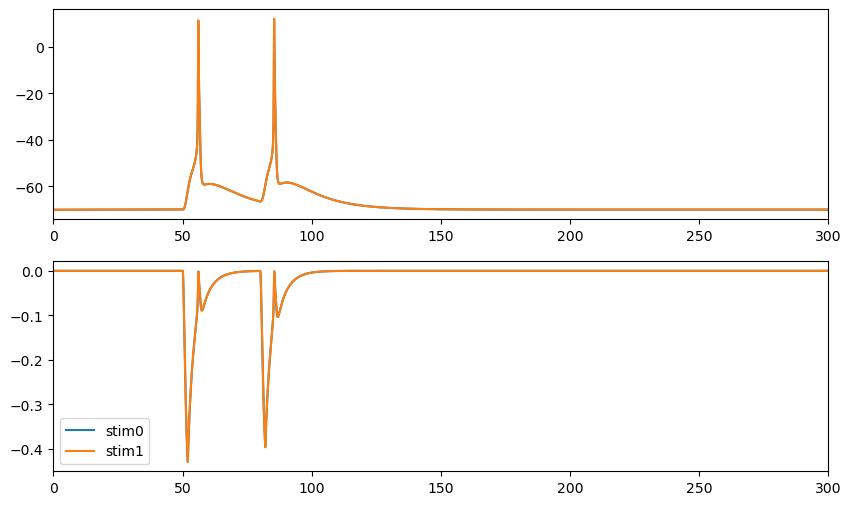

In [3]:

g['stim']['data'][:].T

data=f['report']['bio_net']['data']
data = data[:].T

opto = g['stim']['data'][:].T

mapping=f['report']['bio_net']['mapping']
time = np.arange(mapping['time'][0],mapping['time'][1],mapping['time'][2])

plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(time,data[0],label='node_id0')
plt.plot(time,data[1],label='node_id1')
plt.xlim(0,300)

plt.subplot(2, 1, 2)
plt.plot(time,opto[0],label='stim0')
plt.plot(time,opto[1],label='stim1')
plt.xlim(0,300)

plt.legend()
plt.show()